In [54]:
import pandas as pd, matplotlib.pyplot as plt, os

In [55]:
#Directorio de trabajo
os.chdir("C:/Users/claud/Documents/GitHub/dataviz_varios/")

In [56]:
urlnac="https://datos.cdmx.gob.mx/dataset/53f14c8e-526d-44b1-97a6-15b94571a8bc/resource/ce73e4f2-c3e0-46ad-99d0-19693781e1b3/download/nacimientos_2020_2022_09.csv"

In [57]:
#Leer los datos
dfnac=pd.read_csv(urlnac,encoding='utf-8')

In [58]:
#Filtrar datos de 2022 y 
dfnac=dfnac[dfnac["anio"]==2022]
#Contar registros
dfnac.shape

(47711, 13)

In [59]:
#Filtrar solo aquellos que nacieron en cdmx
dfnac=dfnac[dfnac["estado_nacimiento"]=="Ciudad de México"]
dfnac

,anio,mes,fecha_nacimiento,sexo,pais_nacimiento,estado_nacimiento,alcaldia_nacimiento,tutora_1_edad,tutora_1_sexo,tutora_1_nacionalidad,tutora_2_edad,tutora_2_sexo,tutora_2_nacionalidad
158452,2022,Enero,2022-01-01,Hombre,México,Ciudad de México,Venustiano Carranza,18.0,NaN,NaN,18.0,Mujer,México
158453,2022,Enero,2022-01-01,Mujer,México,Ciudad de México,Benito Juarez,30.0,Hombre,México,30.0,Mujer,México
158454,2022,Enero,2022-01-01,Mujer,México,Ciudad de México,La Magdalena Contreras,38.0,Hombre,México,38.0,Mujer,México
158455,2022,Enero,2022-01-01,Hombre,México,Ciudad de México,La Magdalena Contreras,33.0,Hombre,México,33.0,Mujer,México
158456,2022,Enero,2022-01-01,Mujer,México,Ciudad de México,Miguel Hidalgo,36.0,Hombre,México,36.0,Mujer,México
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206158,2022,Septiembre,2022-09-30,Mujer,México,Ciudad de México,Cuauhtemoc,35.0,Hombre,México,35.0,Mujer,México
206159,2022,Septiembre,2022-09-30,Hombre,México,Ciudad de México,Alvaro Obregon,27.0,Hombre,México,27.0,Mujer,México
206160,2022,Septiembre,2022-09-30,Mujer,México,Ciudad de México,Coyoacan,34.0,Hombre,México,34.0,Mujer,México
206161,2022,Septiembre,2022-09-30,Hombre,México,Ciudad de México,Gustavo A. Madero,27.0,Hombre,México,27.0,Mujer,México


In [60]:
#Contar registros por alcaldía y ordenar de mayor a menor y guardarlos en un nuevo dataframe. Resetear el índice
dfnac=dfnac.groupby("alcaldia_nacimiento").count().sort_values("anio",ascending=False).reset_index()
#Dejar variable de alcaldía y anio
dfnac=dfnac[["alcaldia_nacimiento","anio"]]
#Renombrar columnas
dfnac=dfnac.rename(columns={"alcaldia_nacimiento":"alcaldia","anio":"nacimientos"})
#Cambiar de Cuajimalpa a Cuajimalpa de Morelos
dfnac.loc[dfnac["alcaldia"]=="Cuajimalpa","alcaldia"]="Cuajimalpa de Morelos"
dfnac.loc[dfnac["alcaldia"]=="Cuauhtemoc", "alcaldia"]="Cuauhtémoc"
dfnac.loc[dfnac["alcaldia"]=="Alvaro Obregon","alcaldia"]="Álvaro Obregón"
dfnac.loc[dfnac["alcaldia"]=="Benito Juarez","alcaldia"]="Benito Juárez"
dfnac.loc[dfnac["alcaldia"]=="Tlahuac","alcaldia"]="Tláhuac"
dfnac.loc[dfnac["alcaldia"]=="Coyoacan","alcaldia"]="Coyoacán"
#Pasar nacimiento a entero
#dfnac["nacimientos"]=dfnac["nacimientos"].astype(int)

In [61]:
#Valores únicos de alcaldía
dfnac["alcaldia"].unique()

array(['Álvaro Obregón', 'Iztapalapa', 'Gustavo A. Madero',
       'Miguel Hidalgo', 'Cuauhtémoc', 'Benito Juárez', 'Azcapotzalco',
       'Tlalpan', 'La Magdalena Contreras', 'Venustiano Carranza',
       'Tláhuac', 'Iztacalco', 'Xochimilco', 'Cuajimalpa de Morelos',
       'Milpa Alta', 'Coyoacán', 'No Especificado'], dtype=object)

In [62]:
#Obtener población por alcaldía
urlpob="https://datos.cdmx.gob.mx/dataset/91ae7d55-af8f-410b-b93f-a819d2e8e95c/resource/15eed518-ee91-4ef4-ab18-ef83d831dcdd/download/poblacion_total_tasa_crecimiento_1.1.csv"
dfpob=pd.read_csv(urlpob,encoding='utf-8')
#Columnas en minúsculas
dfpob.columns=[x.lower() for x in dfpob.columns]
#Filtrar solo 2020
dfpob=dfpob[dfpob["año"]==2020]
#Eliminar registro de CDMX  
dfpob=dfpob[dfpob["alcaldia"]!="CDMX"]
#renombrar columnas
dfpob=dfpob.rename(columns={"alcaldia":"alcaldia","población total":"pob"})
#Eliminar columnas
dfpob=dfpob[["alcaldia","pob"]]
#Eliminar comas de la población
dfpob["pob"]=dfpob["pob"].str.replace(",","").astype(int)

In [63]:
#Valores únicos de alcaldía
dfpob["alcaldia"].unique()

array(['Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán',
       'Cuajimalpa de Morelos', 'Cuauhtémoc', 'Gustavo A. Madero',
       'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras',
       'Miguel Hidalgo', 'Milpa Alta', 'Tláhuac', 'Tlalpan',
       'Venustiano Carranza', 'Xochimilco'], dtype=object)

In [64]:
#Pegar los dos dataframes
dfnac=dfnac.merge(dfpob,on="alcaldia")

In [65]:
#Calculamos la tasa de natalidad
dfnac["tasa_natalidad"]=dfnac["nacimientos"]/dfnac["pob"]*1000

In [66]:
#Ordenar de mayor a menor
dfnac=dfnac.sort_values("tasa_natalidad",ascending=True)
dfnac

,alcaldia,nacimientos,pob,tasa_natalidad
15,Coyoacán,573,614447,0.932546
7,Tlalpan,1822,699928,2.603125
12,Xochimilco,1188,442178,2.686701
1,Iztapalapa,5494,1835486,2.993213
9,Venustiano Carranza,1684,443704,3.795323
11,Iztacalco,1553,404695,3.837458
14,Milpa Alta,623,152685,4.080296
13,Cuajimalpa de Morelos,892,217686,4.097645
10,Tláhuac,1624,392313,4.139552
2,Gustavo A. Madero,5447,1173351,4.642260


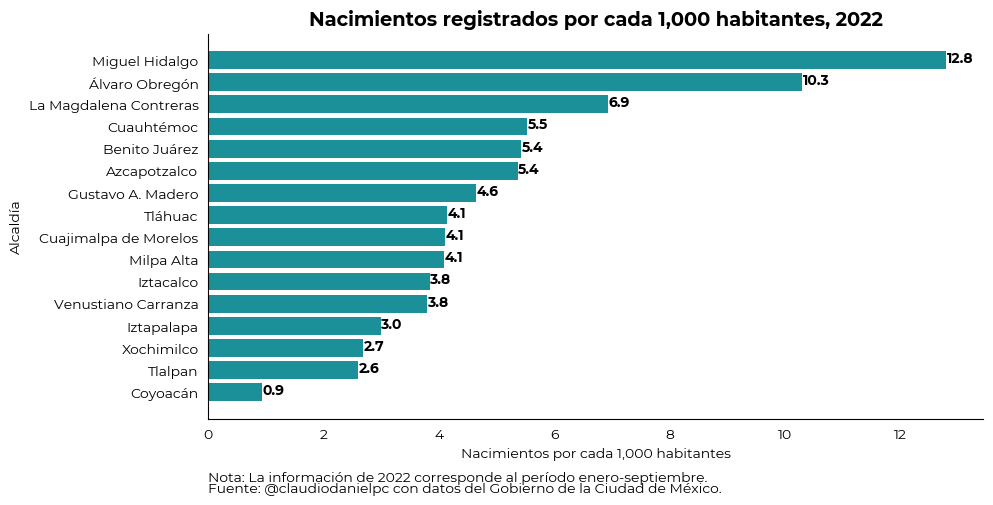

In [68]:
#Gráfica de barras horizontales

plt.rcParams["font.family"]="Montserrat"

plt.figure(figsize=(10,5))
plt.barh(dfnac["alcaldia"],dfnac["tasa_natalidad"],color="#1c9099")
plt.title("Nacimientos registrados por cada 1,000 habitantes, 2022", fontweight="bold",fontsize=14)
plt.xlabel("Nacimientos por cada 1,000 habitantes")
plt.ylabel("Alcaldía")
#Eliminar marco
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
#Etiquetas de valores
for i, v in enumerate(dfnac["tasa_natalidad"]):
    plt.text(v+0.01, i-0.1, str(round(v,1)), color='black', fontweight='bold')
#Eliminar ticks
plt.tick_params(axis="both",which="both",bottom=False,left=False)
#Fuente de datos
plt.text(0,-4.5,"Fuente: @claudiodanielpc con datos del Gobierno de la Ciudad de México.",fontsize=10)
plt.text(0,-4,"Nota: La información de 2022 corresponde al período enero-septiembre.",fontsize=10)
#Guardar gráfica
plt.savefig("natalidad.png",bbox_inches="tight",dpi=300)